# Assessment of Accuracy Metrics for Time Series Forecasting

Forecasting plays a pivotal role in industry by providing critical insights and foresight. It enables efficient resource allocation, cost reduction, and demand planning. Industries rely on forecasts for optimizing inventory, enhancing supply chain efficiency, and making informed decisions in areas like finance, marketing, and risk management. Accurate forecasting empowers businesses to adapt to changing market dynamics, ensuring competitiveness and sustainability in today's dynamic business landscape. But How do you know if your forecasts are accurate for your business case?

This article tries to answer this problem. Firstly, the article performs a time series forecasting using the StatsForecast library developed by Nixtla. Then the Accuracy Metrices are discussed along with their mathematical interpretation and associated advantages

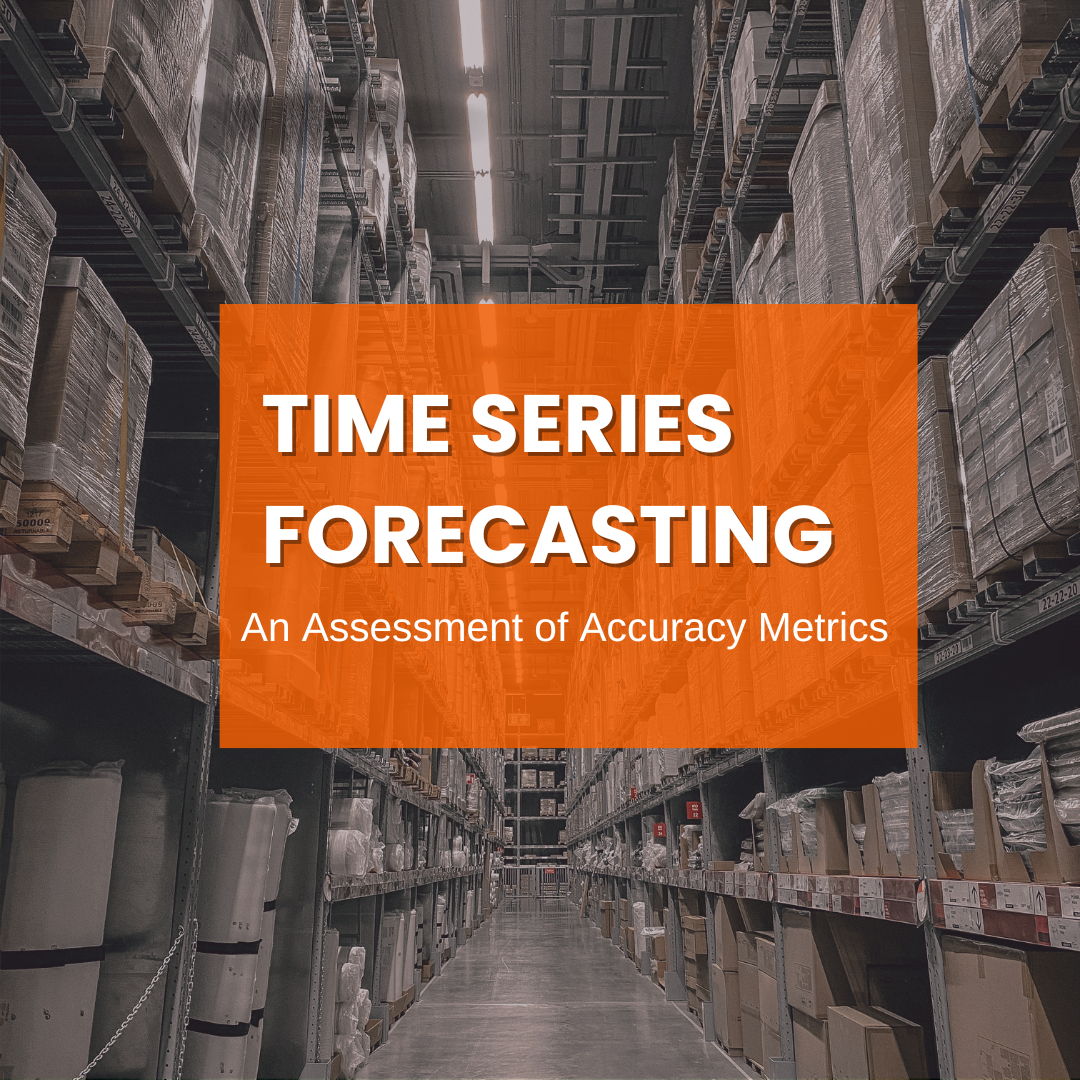

## Contents

- What is a Time Series?
- Time Series Analysis vs Forecasting
- StatsForecast Library
- Forecasting Model Building
 - Importing Libraries
 - Loading the Dataset
 - Visualizing the Data
 - Performing ETL Decomposition
 - ADF TestModel Building
- Accuracy Metrics
 - Mean Absolute Error(MAE)
  - Root Mean Square Error (RMSE)
  - Mean Absolute Percentage Error (MAPE)
  - Symmetric Mean Absolute Percentage Error (SMAPE)
  - Median Absolute Percentage Error (MDAPE)
  - Geometric Mean Relative Absolute Error (GMRAE)
- Conclusion

## 1. What is a Time Series?

A time series (or data series in general) is an ordered set 𝑇 = {𝑇1,𝑇2, . . . ,𝑇𝑚} of 𝑚 real-valued, potentially multidimensional data points where 𝑇𝑖 ∈ R 𝑛 .

It is a sequence of data points recorded or measured at successive points in time, typically at regular intervals. It is used to analyze and understand how a variable changes over time, making it valuable for forecasting and identifying trends, patterns, or anomalies in various fields like finance, economics, weather, and more. Time series data helps us make informed decisions by studying past behaviors to predict future outcomes.


## 2. Time Series Analysis vs Forecasting

Time Series Analysis and Time Series Forecasting, while closely related, are distinct disciplines. They are frequently used interchangeably in various literature, but it's important to note that they exhibit notable differences, as outlined in the table below:

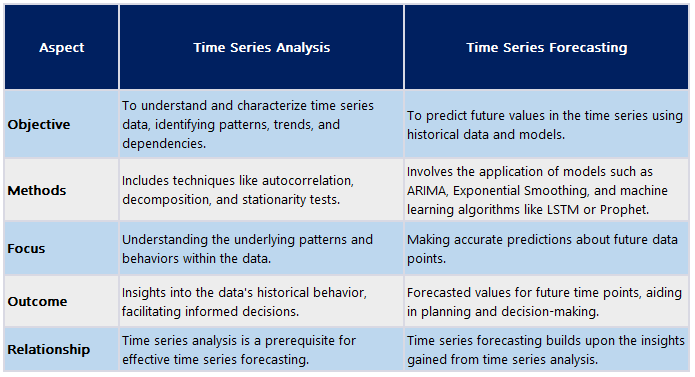

Time series forecasting finds many applications in the industry, and one of its paramount roles is in supply chain management. In this domain, it plays a pivotal role in anticipating future demand patterns, aiding businesses in optimizing their inventory levels, reducing operational costs, and bolstering customer service. By ensuring products are available when needed and aligning resources with demand fluctuations, it empowers organizations to operate efficiently and maintain a competitive edge in the ever-evolving market landscape. Furthermore, its contributions extend to strategic long-term planning and sustainability efforts, making it an indispensable tool for modern supply chain operations.

Before we move on to the code parts, let us briefly look into the StatsForecast Library by NIXTLA

## 3. The StatsForecast Library

StatsForecast offers a collection of widely used univariate time series forecasting models, including automatic ARIMA, ETS, CES, and Theta modeling optimized for high performance using numba. It also includes a large battery of benchmarking models.

Features

- Fastest and most accurate implementations of AutoARIMA, AutoETS, AutoCES, MSTL and Theta in Python.
- Out-of-the-box compatibility with Spark, Dask, and Ray.
- Probabilistic Forecasting and Confidence Intervals.
- Support for exogenous Variables and static covariates.
- Anomaly Detection.
- Familiar sklearn syntax: .fit and .predict






[Nixtla Github Link](https://github.com/Nixtla/statsforecast/tree/main/statsforecast)



## 4. Forecasting Model Building

### 4.1 Setting up Libraries

In [1]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 15.8 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.6-py3-none-any.whl size=158045 sha256=63f74aadba7f75c0bfb36b7966dfcc1ac17a7b59d018fa94b4186d60780e4bb4
  Stored in directory: /root/.cache/pip/wheels/c8/54/a1/b294b8b33c6107946b5720b3acb1fce07b97bbbc9677a501ce
Successfully built fugue-sql-antlr


In [2]:
#Install statsforecast
!pip install statsforecast

# Import necessary libraries
# NumPy will be used for numerical operations and array handling.
import numpy as np

# Pandas will be used to work with time series data using DataFrames.
import pandas as pd

# Seaborn and Matplotlib will be used for data visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Statsmodels will be used for time series decomposition and stationarity testing.
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# The statsforecast library will be used for time series forecasting.
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

# Scikit-learn's metrics will be used to evaluate the forecast accuracy.
from sklearn.metrics import mean_absolute_error, mean_squared_error


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:25: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### 4.2  Loading the Dataset

In [3]:
# Replace 'your_data.csv' with your actual dataset filename
df = pd.read_csv('Electric_Production.csv', parse_dates=['Date'], index_col='Date')
df = df.resample("M").max()

### 4.3 Visualizing the Data

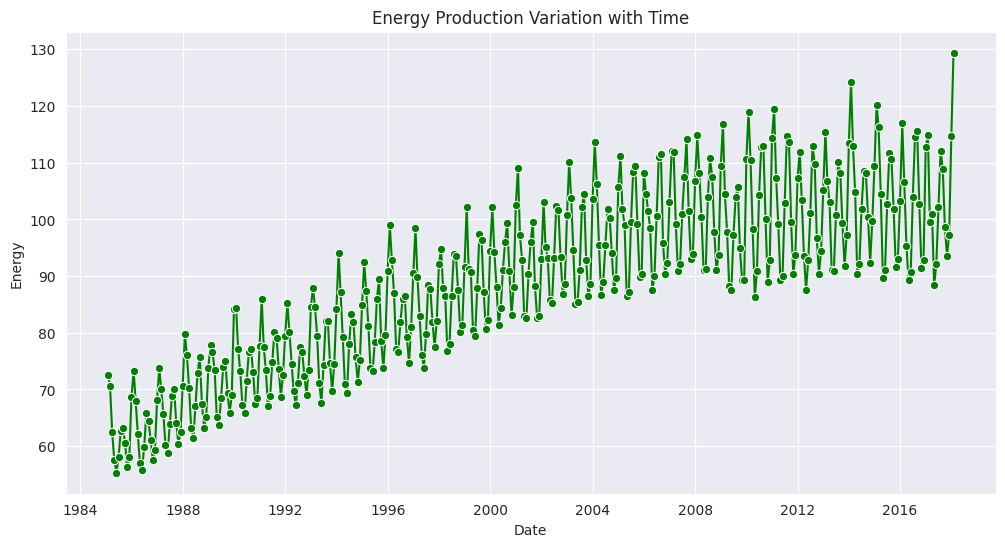

In [4]:
# Set the style to dark grid for better visibility
sns.set_style("darkgrid")

# Create the plot figure
plt.figure(figsize=(12, 6))

# Plot the time series data with green line color and markers
sns.lineplot(data=df, x=df.index, y='Energy', marker='o', color='green')

# Set the title and axis labels
plt.title('Energy Production Variation with Time')
plt.xlabel('Date')
plt.ylabel('Energy')

# Display the grid
plt.grid(True)

# Show the plot
plt.show()



### 4.4 Performing ETL Decomposition

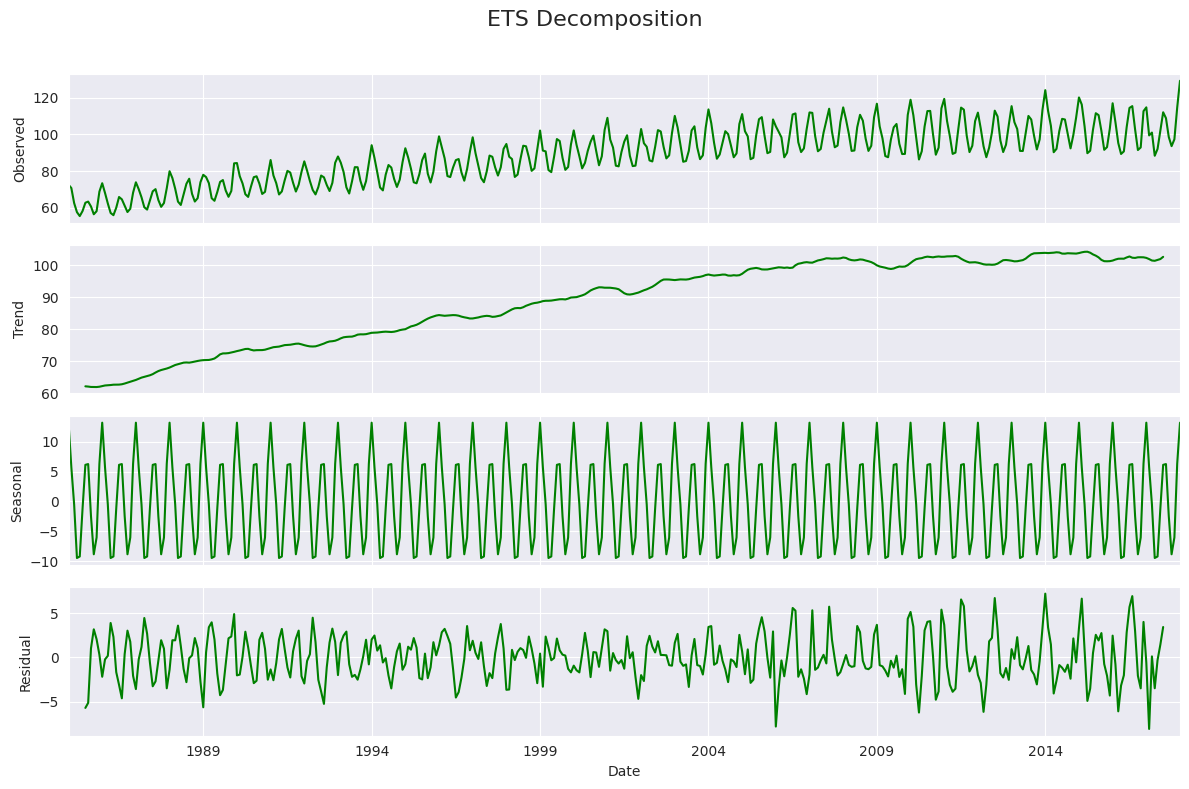

In [5]:
# Perform decomposition
decomposition = seasonal_decompose(df['Energy'], model='additive', period=12)
# Create custom subplots for each component
# Initialize a figure with 4 subplots arranged vertically
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
# Plot the observed component in the first subplot with green line color
decomposition.observed.plot(ax=axes[0], color='green')
axes[0].set_ylabel('Observed')
# Plot the trend component in the second subplot with green line color
decomposition.trend.plot(ax=axes[1], color='green')
axes[1].set_ylabel('Trend')
# Plot the seasonal component in the third subplot with green line color
decomposition.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal')
# Plot the residual component in the fourth subplot with green line color
decomposition.resid.plot(ax=axes[3], color='green')
axes[3].set_ylabel('Residual')
# Set a common X-axis label
plt.xlabel('Date')
# Set the main title for the entire plot
plt.suptitle('ETS Decomposition', fontsize=16)
# Adjust subplot spacing and position the main title
plt.tight_layout()
plt.subplots_adjust(top=0.9)
# Display the plot
plt.show()


### 4.5 ADF Test

In [6]:
# Perform the Augmented Dickey-Fuller (ADF) test to assess stationarity
# Get the ADF test results
result = adfuller(df['Energy'])

# Print the ADF Statistic
print("ADF Statistic:", result[0])

# Print the p-value
print("p-value:", result[1])

# Print the Critical Values
print("Critical Values:", result[4])

# Check the p-value against the significance level (0.05) to make a stationarity inference
if result[1] <= 0.05:
    print("Reject the null hypothesis. Data has no unit root, indicating seasonality.")
else:
    print("Fail to reject the null hypothesis. Data has a unit root, indicating non-seasonality.")


ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
Critical Values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}
Fail to reject the null hypothesis. Data has a unit root, indicating non-seasonality.


### 4.6 Model Building

Now let us build the model using StasForecast library. For this, the statsforecast library needs an "unique_id" row, a date row "ds" and the quantity row "y".

So we will load our data into a new dataframe compatible with the library,

In [7]:
df = df.reset_index()

In [8]:
input_df = pd.DataFrame({'unique_id':[1.0]*len(df),'ds':df["Date"], 'y':df["Energy"],})
input_df.head()

,unique_id,ds,y
0,1.0,1985-01-31,72.5052
1,1.0,1985-02-28,70.6720
2,1.0,1985-03-31,62.4502
3,1.0,1985-04-30,57.4714
4,1.0,1985-05-31,55.3151


In [9]:
# Split the data into training and testing sets (90% train, 10% test)
train_size = int(len(input_df) * 0.9)
train_data = input_df.iloc[:train_size]
test_data = input_df.iloc[train_size:]

# Define the season length as 12 months for monthly data
season_length = 12

# Define a list of models for forecasting
models = [AutoARIMA(season_length=season_length)] # ARIMA model with automatic order selection and seasonal component

# Instantiate the StatsForecast class with models, data frequency ('M' for monthly),
# and parallel computation on all CPU cores (n_jobs=-1)
forecast = StatsForecast(
    models=models, # models for forecasting
    freq='M',  # frequency of the data
    n_jobs=-1  # number of jobs to run in parallel, -1 means using all processors
)

# Fit the forecasting models to the training data
forecast.fit(train_data)

# Perform the forecast for the length of the test data
prediction = forecast.predict(h=len(test_data))

# Merge the test data with the forecasted values
final_test_data = pd.merge(test_data, prediction)

# Display the first few rows of the merged data
final_test_data.head()


,unique_id,ds,y,AutoARIMA
0,1.0,2014-10-31,92.3837,92.581223
1,1.0,2014-11-30,99.7033,96.334389
2,1.0,2014-12-31,109.3477,110.274155
3,1.0,2015-01-31,120.2696,118.533691
4,1.0,2015-02-28,116.3788,108.715614


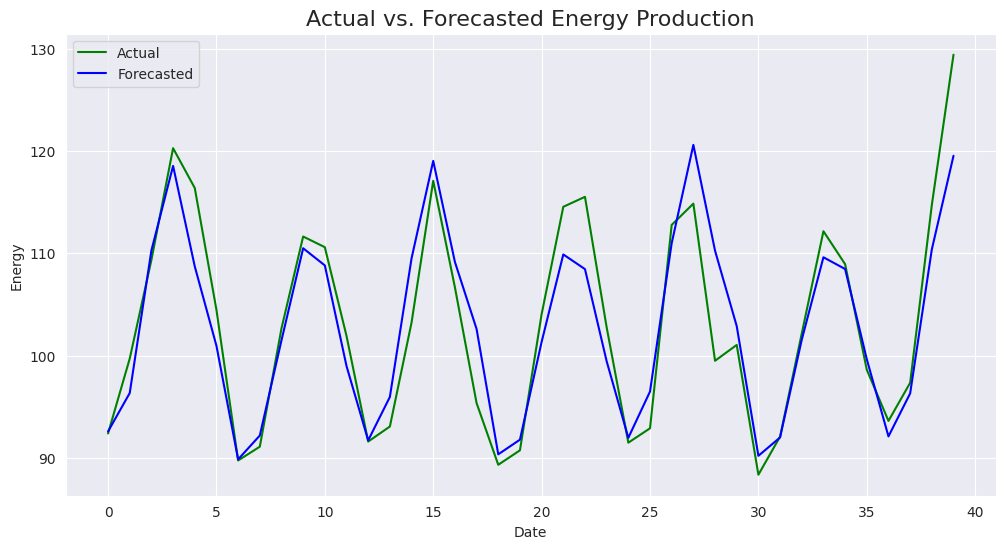

In [10]:
# Set the style to dark grid for better visibility
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Plot the actual data (y) in green
sns.lineplot(data=final_test_data, x=final_test_data.index, y='y', color='green', label='Actual')

# Plot the forecasted data in blue
sns.lineplot(data=final_test_data, x=final_test_data.index, y='AutoARIMA', color='blue', label='Forecasted')

# Set the title and axis labels
plt.title('Actual vs. Forecasted Energy Production', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Energy')

# Display a legend
plt.legend()

# Show the plot
plt.show()


As observed in the graph above, we can assess the effectiveness of our model in predicting energy demand.

But how well is it performing?

If we were to create another model for the same dataset, would it outperform or underperform our current model?

To answer these questions, we need to rely on quantifiable measures known as Accuracy Metrics, which we'll introduce in the next section.

## 5. Accuracy Metrics

Accuracy Metrices help to achieve the following:

- Performance Assessment: They offer a quantitative means to evaluate forecasting models.
- Model Selection: Facilitate the choice of the most suitable model among alternatives.
- Informed Decision-Making: Accurate forecasts are essential for making informed decisions.
- Error Analysis: Help understand the nature and magnitude of prediction errors.- Model Optimization: Enable iterative improvements in forecasting model performance.
- Benchmarking: Establish benchmarks and performance targets for models.
- Quality Control: Vital for inventory management and production quality
- Continuous Improvement: Monitor progress and maintain forecast quality over time.

Let's check the accuracy metrices one by one

### 5.1 Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is a commonly used metric for measuring the accuracy of predictions or forecasts. It quantifies the average absolute difference between the predicted or forecasted values and the actual values. The formula for calculating MAE is as follows:

**MAE = (1 / n) * Σ |actual - forecast|**

Where:

MAE is the Mean Absolute Error.

n is the number of data points (samples).

Σ represents the sum over all data points.

|actual - forecast| is the absolute difference between the actual value and the forecasted value for each data point.

Let's find the MAE for our data.

In [11]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(final_test_data['y'], final_test_data['AutoARIMA'])

# Print MAE
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 2.8489


MAE of 2.8489 indicates that, on average, our forecasts are off by about 2.8489 units from the actual values. A lower MAE suggests better accuracy, while a higher MAE indicates less accurate forecasts.

Advantages:

- Easy to understand as it provides a straightforward measure of forecast accuracy.
- The error values are in the same units as the original data, making it interpretable.
- Robust to outliers since it uses absolute differences.

Disadvantages:

- Does not penalize large errors more heavily, which may be a limitation in cases where large errors are more critical.
- Treats overestimation and underestimation equally.

### 5.2 Root Mean Squared Error (RMSE)

The **Root Mean Squared Error (RMSE)** is another widely used metric for measuring the accuracy of predictions or forecasts. RMSE quantifies the average magnitude of errors between the predicted or forecasted values and the actual values, giving more weight to larger errors. It's an important metric, especially when larger errors are of greater concern. The mathematical expression for calculating RMSE is as follows:

**RMSE = √((1 / n) * Σ(actual - forecast)²)**

Where:

RMSE is the Root Mean Squared Error.

n is the number of data points (samples).

Σ represents the sum over all data points.

(actual - forecast)² is the squared difference between the actual value and the forecasted value for each data point.

Let us check the RMSE for this data:

In [12]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(final_test_data['y'], final_test_data['AutoARIMA'],
                          squared=False)

# Print the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 3.8863


RMSE  quantifies the average magnitude of the errors. In this case, an RMSE of 3.8863 suggests that, on average, the forecasts are off by about 3.8863 units from the actual values.

Advantages:

- Provides a measure of forecast error that gives higher weight to large errors.
- Penalizes larger errors more heavily than MAE.
- Error values are in the same units as the original data.

Disadvantages:

- Sensitive to outliers, as it squares the differences between actual and predicted values.

### 5.3 Mean Absolute Percentage Error (MAPE)

The **Mean Absolute Percentage Error (MAPE)** is a metric used to measure the accuracy of predictions or forecasts as a percentage of the actual values. It quantifies the average percentage difference between the predicted or forecasted values and the actual values. The mathematical expression for calculating MAPE is as follows:

**MAPE = (1 / n) * Σ(|(actual - forecast) / actual|) * 100%**

Where:

MAPE is the Mean Absolute Percentage Error, expressed as a percentage.

n is the number of data points (samples).

Σ represents the sum over all data points.

|(actual - forecast) / actual| is the absolute percentage difference between the actual value and the forecasted value for each data point.

The result is multiplied by 100% to express the error as a percentage.

Let us find the MAPE for our data:

In [13]:
mape = np.mean(np.abs((final_test_data['y'] - final_test_data['AutoARIMA'])
/ final_test_data['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

Mean Absolute Percentage Error (MAPE): 2.6810


A MAPE of 2.6810 suggests that, on average, your forecasts deviate by about 2.6810% from the actual values. A lower MAPE indicates better accuracy, while a higher MAPE suggests less accurate forecasts.

Advantages:

- Expresses errors as a percentage of actual values, which can be useful for understanding the relative magnitude of errors.
- Suitable for comparing forecasting performance across different datasets or variables.

Disadvantages:

- Problematic when actual values are close to zero since it can result in division by zero or extremely large percentage errors.
- Not symmetric; it does not consider the direction of errors (overestimation vs. underestimation).


### 5.4 Symmetric Mean Absolute Percentage Error (SMAPE)

The **Symmetric Mean Absolute Percentage Error (SMAPE)** is a metric used for measuring the accuracy of predictions or forecasts in time series analysis. It's particularly useful when you want to assess forecast accuracy while considering both overestimation and underestimation errors. SMAPE calculates the percentage difference between predicted or forecasted values and actual values, but it symmetrically treats overestimation and underestimation errors. The mathematical expression for calculating SMAPE is as follows:

**SMAPE = (1 / n) * Σ(2 * |actual - forecast| / (|actual| + |forecast|)) * 100%**

Where:

SMAPE is the Symmetric Mean Absolute Percentage Error, expressed as a percentage.

n is the number of data points (samples).

Σ represents the sum over all data points.

|actual - forecast| is the absolute difference between the actual value and the forecasted value for each data point.
|actual| and |forecast| are the absolute values of the actual and forecasted values, respectively.

The result is multiplied by 100% to express the error as a percentage.

Let us check the SMAPE for our data:

In [14]:
smape = np.mean((np.abs(final_test_data['y'] - final_test_data['AutoARIMA']) /((np.abs(final_test_data['y']) +  np.abs(final_test_data['AutoARIMA'])) / 2))) * 100
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.4f}")

Symmetric Mean Absolute Percentage Error (SMAPE): 2.6773


SMAPE of 2.6773 suggests that, on average, our forecasts deviate by about 2.6773% from the actual values in a symmetric manner. A lower SMAPE indicates better accuracy, while a higher SMAPE suggests less accurate forecasts.

Advantages:

- Overcomes the directionality issue of MAPE by considering both overestimation and underestimation errors.

Disadvantages:

- Less intuitive than MAE and RMSE for some users.
- Like MAPE, it can still have issues when actual values are close to zero.

### 5.5 Median Absolute Percentage Error (MDAPE)


MDAPE stands for **Median Absolute Percentage Error**. It is a performance metric used to evaluate the accuracy of forecasts in time series analysis. MDAPE is similar to the Mean Absolute Percentage Error (MAPE), but instead of taking the mean of the absolute percentage errors, it takes the median. This makes MDAPE less sensitive to outliers than MAPE.

The formula for calculating MDAPE is as follows:

**MDAPE = Median(|(Actual - Forecast) / Actual|) * 100%**

Where:

Actual represents the actual values or observations in the time series.

Forecast represents the corresponding forecasted values.

MDAPE is expressed as a percentage, and it measures the median percentage difference between the actual and forecasted values. It is particularly useful when dealing with time series data that may have extreme values or outliers because it focuses on the middle value of the distribution of percentage errors.

Let's check how MDAPE looks for our data:

In [15]:
mdape = np.median(np.abs((final_test_data['y'] - final_test_data['AutoARIMA'])/ final_test_data['y']))*100
print(f"Median Absolute Percentage Error (MDAPE): {mdape:.4f}")

Median Absolute Percentage Error (MDAPE): 1.7398


Advantages of MDAPE:

- Robust to outliers: MDAPE is less affected by extreme errors compared to metrics like MAPE, which can be heavily influenced by a few large errors.
- Provides a measure of central tendency: The median is a measure of central tendency, making MDAPE a good choice when you want to understand the typical forecasting error.

Disadvantages of MDAPE:

- May not provide as much information about the overall distribution of errors as other metrics like RMSE.
- Like MAPE, MDAPE can be problematic when actual values are close to zero, as it may result in division by very small numbers or extremely large percentage errors.

### 5.6 Geometric Mean Relative Absolute Error (GMRAE)

The **Geometric Mean Relative Absolute Error (GMRAE)** is a metric used to assess the accuracy of predictions or forecasts in time series analysis. It takes the geometric mean of the relative absolute errors, providing a single aggregated measure of forecast accuracy. GMRAE is particularly useful when you want to consider both overestimation and underestimation errors. Here's the mathematical formula for GMRAE:

**GMRAE = (Π |(actual - forecast) / actual|)^(1/n) * 100%**

Where:

GMRAE is the Geometric Mean Relative Absolute Error, expressed as a percentage.

Π represents the product over all data points.

|actual - forecast| is the absolute difference between the actual value and the forecasted value for each data point.
|(actual - forecast) / actual| is the relative absolute error for each data point.

n is the number of data points (samples).

In words, GMRAE calculates the relative absolute error (the absolute difference divided by the actual value) for each data point, takes the product of these relative absolute errors, raises the result to the power of 1/n (where n is the number of data points), and then expresses the result as a percentage.


In [16]:
gmrae =np.prod(np.abs((final_test_data['y'] - final_test_data['AutoARIMA'])/ final_test_data['y']) ** (1/len(final_test_data["y"])))*100

print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae:.4f}")

Geometric Mean Relative Absolute Error (GMRAE): 1.6522


A GMRAE value of 1.6522 indicates that, on average, the forecasted values have an error of approximately 1.6522% relative to the actual values.

Advantages:

- GMRAE provides a balanced assessment of forecast accuracy by considering both overestimation and underestimation errors equally.

- It is less sensitive to extreme errors or outliers in the data, making it suitable for datasets with occasional large errors.

- GMRAE is expressed as a percentage, facilitating easy interpretation.

- It offers a single, summarized measure of forecast accuracy for model comparison.

Disadvantages:

- GMRAE may not reveal subtle differences in forecasting performance compared to other metrics.

- It can be problematic when actual values are zero, requiring special handling.

- GMRAE is less commonly used than some other forecasting metrics.

- Calculating GMRAE involves taking the geometric mean of relative absolute errors, which can be more complex than other metrics.






## 6. Concluding Remarks

Concluding Remarks:
In this article, you have been introduced to the utilization of the Stasforecast library by Nixtla and have gained an understanding of the different accuracy metrics employed in time series forecasting, along with their respective advantages and disadvantages.

Things to remember:


- Use MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) when you want to measure the magnitude of errors and need a metric that is easy to interpret. RMSE is preferred when larger errors should be penalized more heavily.

- Use MAPE (Mean Absolute Percentage Error) and SMAPE (Symmetric Mean Absolute Percentage Error) when you want to express errors as percentages of actual values and need a metric that is suitable for comparing forecast performance across different datasets.

- Use MDAPE (Median Absolute Percentage Error) when dealing with time series data that may have outliers or extreme values. MDAPE is robust to outliers because it calculates the median of the absolute percentage errors.

- Use GMRAE (Geometric Mean Relative Absolute Error) when you want to compare forecast performance across different time series with varying scales. GMRAE provides a balanced measure of forecast accuracy across multiple forecasts.

- Use R-squared (R2) when you want to assess how well the forecast model captures the variation in the data. However, keep in mind that R-squared  alone may not provide a complete picture of forecast accuracy, and it is often used in conjunction with other metrics to evaluate model performance comprehensively.

Each of these metrics has its own strengths and weaknesses, and the choice should depend on your specific forecasting task, data characteristics, and the importance of different aspects of forecast accuracy. It's often a good practice to consider multiple metrics to gain a comprehensive understanding of your forecasting model's performance.

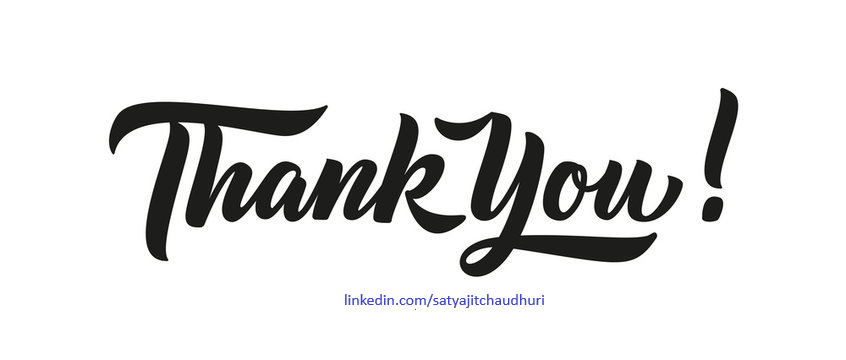